<a href="https://colab.research.google.com/gist/pazdror/e1e3e865179f57432fee768abe951f0c/ims_radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
# Configs
# The files are available at: 
# https://drive.google.com/open?id=1nQ1_I71mD40pr2vwH_2if4_OuoDSqZk5
# You probably needs to copy it to your space, and change the paths accordingly.
app_dir='gdrive/My Drive/ClimaCell/IMS_INCA'
data_dir = os.path.join(app_dir,'Data')
lats_f = os.path.join(app_dir,'app_data','RADlatitude.asc')
lons_f = os.path.join(app_dir,'app_data','RADlongitude.asc')
filename_template = 'RMcomp_%Y%m%d%H%M.asc.gz'



In [0]:
## Read coordinates
import pandas as pd
lons = pd.read_csv(lons_f, delimiter=' ',header=None)
lats = pd.read_csv(lats_f, delimiter=' ',header=None)
coords = pd.Panel({'lons':lons,'lats':lats}) # yes, it's old code. should migrate to xarray
extent = (coords.lons.values.min(), coords.lats.values.min(), coords.lons.values.max(), coords.lats.values.max())
minlon,minlat,maxlon,maxlat = extent



In [0]:
## Read data files and arrange then into pandas panel (ye, it's deprecated)
from glob import glob
from datetime import datetime
d={}
for fn in glob(data_dir+'/RMcomp*.gz'): # bit scatchy for this notebook
  df = pd.read_csv(fn,delimiter=' ',index_col=None, header=None)
  h=datetime.strptime(os.path.basename(fn),filename_template)
  d[h]=df
data_panel=pd.Panel(d)
 

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 561 (major_axis) x 561 (minor_axis)
Items axis: 2018-04-30 07:50:00 to 2018-04-30 10:10:00
Major_axis axis: 0 to 560
Minor_axis axis: 0 to 560


In [0]:
# load basemap
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'boundaries'
  s)


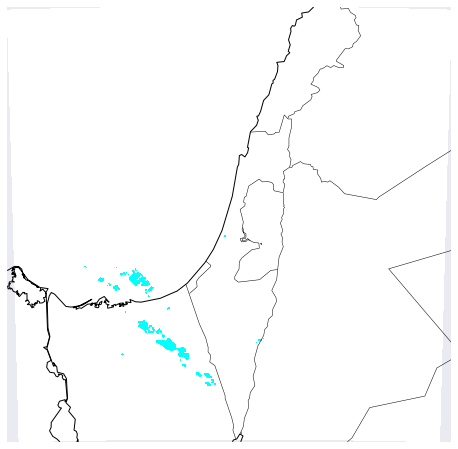

In [0]:
# plot map
data = data_panel.sum(axis=0)
plt.figure(figsize=(8, 8))
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='merc',lon_0=34,lat_0=32.,lat_ts=32,llcrnrlat=minlat,urcrnrlat=maxlat,llcrnrlon=minlon,urcrnrlon=maxlon,rsphere=6371200.,resolution='i',area_thresh=10000)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
clevs = [0.1,0.5,1,3,5,10,15,20,30,40,60,80,100,150,200]
cmap = mpl.colors.ListedColormap(['cyan', 'c', 'blue', 'lime','limegreen','g', 'yellow','goldenrod','darkorange','tomato', 'r','firebrick','magenta','purple'])
norm = mpl.colors.BoundaryNorm(clevs, cmap.N)
cmap.set_over((.5,.5,.5))
cmap.set_under((1,1,1))
cs = m.contourf(coords['lons'].as_matrix(), coords['lats'].as_matrix(),
                    data.as_matrix(),clevs,norm=norm, boundaries=[0] + clevs + [16],
                            extend='both',cmap=cmap, latlon=True,zorder=1)
